### The Birthday Problem


The birthday problem is a known statistical exercise commonly used to show the counterintuitive  nature of probability. The problem asks: given a group of *n* people, what is the probability that there is **at least one** repeated date of birth within that group?

The derivation of this probability is fairly easy, although not trivial. Moreover, given that there are 365 possible birth dates, most people assume that, for that probability to be of considerable magnitude (for example, 0.5) the number *n* should be in the hundreds. But that turns out not to be the case.

The probability, as a function of *n*, of having at least one repeated birth date is given by the next formula:

\begin{equation}
    P_{x>0} = p(n) = 1 - \prod_{i=1}^{n-1}\left(1-\frac{i}{365}\right)
\end{equation}

If we introduce some values of *n* we found that for a group of 23, the probability of having a repetition is already 0.5073. So a much lower *n* value than expected is required!

However, the problem suggests some questions for the curious minded... What is the probability of having **exactly** one repeated birth date in the group? What about two repeated birth dates? That is what this repository investigates and answers.

### The Birthday Repetition Probability Function

Firstly, from now on I'll refer to the number of repeated birth dates as *the repetition number x*. The number of possible birth dates will be *r* (set in this case to 365, but a free parameter for other similar problems). To answer the questions from the last paragraph, we need a probability function. That is, a function that for a set of parameters (*r* and *n*), gives the probability that a random variable called *X*, which represents the repetition number, will take the value *x*.  

After some investigation of my own, I discovered this function, which is the following:

\begin{equation}
    P(X_{r,n}=x) = f(x) = \left[\binom{r}{n-x}\sum_{k_1 + k_2 +...+k_{n-x} = n\\ \hspace{0.8cm} 1 \leq k_i \leq x+1} \frac{n!}{k_1!k_2!...k_{n-x}!}\right]\Large{/} \normalsize{r^n}
\end{equation}

It has a rather cumbersome appearance. The most disturbing part without a doubt is the summation. What are exactly the summands? The summation is done along every combination of the $k_{i}$ integer indices that add up to *n*. As the notation shows, there are $n-x$ of these indices, and their values are constrained by $1 \leq k_i \leq x+1$. The summands themselves are what is called permutations with repetition, in which the $k_i$ indices indicate the number of repetition for each element (not to confuse with the repetition number *x*). A combination of *r* elements taken *n-x* at a time multiplies the whole summation, and this is divided by the variations with repetition of *r* elements taken *n* at a time (which is just $r^n$)

I'll spare you the details of how I came up with it and jump into the interesting question: How do I know it is true? It doesn't look easy to compute. How do I find all the combinations of all those indices?

Well, firstly we could examine a simple case: $x=0$. If the formula is correct, it should replicate the results of the Birthday Problem equation. Let's see: if we plug $x=0$ in this formula, we find out:

\begin{equation}
    P(X_{r,n}=0) = f(0) = \left[\binom{r}{n}\sum_{k_1 + k_2 +...+k_{n} = n\\ \hspace{0.8cm} 1 \leq k_i \leq x+1} \frac{n!}{k_1!k_2!...k_{n-x}!}\right]\Large{/} \normalsize{r^n} = \left[\binom{r}{n}n!\right]\Large{/} \normalsize{r^n} = \left[\frac{r!}{(r-n)!}\right]/r^n
\end{equation}

This is the probability of obtaining 0 repetitions. So, considering $r=365$ the probability of having at least 1 repetition is just *1 minus this*:

\begin{equation}
    P(X_{r=365,n}=0) = f(0) = 1 - \left[\frac{365!}{(365-n)!}\right]/365^n =
    1- \left[\frac{1 · 2 \cdots 365}{1 · 2 \cdots(365-n)}\right]/365^n =
\end{equation}

\begin{equation}
    = 1- \frac{(365-n+1)\cdots 365}{365^n} = 1 -\left(\frac{365-n+1}{365}\right)\cdots\left(\frac{365}{365}\right) = 
\end{equation}
 
\begin{equation}
    = 1 -\left(1 + \frac{1-n}{365}\right) \cdot \left(1 + \frac{2-n}{365}\right) \cdots \left(1 + \frac{n-n}{365}\right) =1-  \prod_{i=1}^{n} \left(1 + \frac{i-n}{365}\right) = 1-  \prod_{i=1}^{n} \left(1 - \frac{n-i}{365}\right)
\end{equation}

\begin{equation}
    P(X_{r=365,n}=0)  = 1-  \prod_{i=1}^{n-1} \left(1 - \frac{i}{365}\right)
\end{equation}

So in fact this is the equation of the Birthday Problem. This is promising, but not enough to assure us that we have found the correct probability function. We need to generalize to other values of *x*. So, lets turn to the computational part.

### Simulating the Birthday Problem and computing the probability function.

Apart from the analytical derivation done in the previous segment, we need to put the probability function to test. We need to compare its output to an estimate of the real probabilities we are looking for. We will find this estimate by simulating the birthday problem. This is acomplished by the *sim_birthday* function defined below. The function runs *numSim* simulations; in each of them, it selects at random the birth date of *n* people (represented by an integer from 1 to 365), and then counts how many repetitions occur, storing that information in a dictionary. At the end of the whole execution, the dictionary stores the relative frecuency of each repetition number that took place. This relative frequency, for a large enough *numSim*, is a very good estimate of the probability of that repetition number.

Now that we have simulation data, let's turn to our analytical computation of the Birthday Repetition Probability Function. The first part of the formula consists of a binomial coefficient: $$\binom{r}{n-x}$$

This is can be easily calculated using the *math.comb* function from the *math* Python library.

The summation is the tricky part:

$$\sum_{k_1 + k_2 +...+k_{n} = n\\ \hspace{0.8cm} 1 \leq k_i \leq x+1} \frac{n!}{k_1!k_2!...k_{n}!}$$

We need every combination of $1 \leq k \leq x+1$ integers that satisfy $k_1 + k_2 +...+k_{n} = n$, do this operation with each of them: $\frac{n!}{k_1!k_2!...k_{n}!}$ and then add all the results. The combinations are obtained by the *recursion* method below. This method works recursively, starting with a list of ones and generating all the valid results from it. Although dynamic programming has been used, the order of complexity of the algorithm renders this part of the calculation as the most costly.  The number of operations needed for obtaining every combination roughly follows this expression:

$$\sum_i^x (n-x)^i = \frac{1-(n-x)^{x+1}}{1-(n-x)}$$

For a given value of *n*, this formula grows exponentially in *x*, but then stabilizes and decreases, again, exponentially. It usually peaks near $x =0.6\cdot n$. I provide a graph for a good visual impresion in the next code cell:

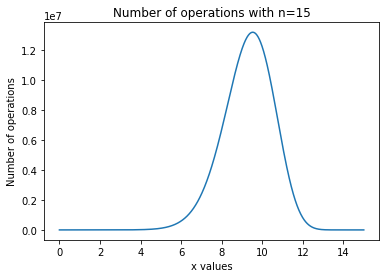

In [20]:
import numpy as np
import pylab as py

n=15

xpoints= np.linspace(0,n,1000)
ypoints= (1-(n-xpoints)**(xpoints+1))//(1-(n-xpoints))

py.figure('Complexity')
py.plot(xpoints,ypoints)
py.title('Number of operations with n='+ str(n))
py.ylabel('Number of operations')
py.xlabel('x values')
py.show()

(In this graph decimal values of *x* has been used to show the behaviour, although *x* can only take integer values).

For a given value of *x*, it grows polynomially on *n*, which is also not a very good thing computationally.

For this reason, this is an impractical calculation for large values of *n* and values of *x* far from $x\simeq0$ and $x\simeq n$. But it doesn't prevent us from testing the validity of the  probability function for a sufficiently large set of examples.

The *recursion* function is called by the *summation* function, which carries out the addition. The final probability for given values of *r,n* y *x* is then calculated by *birth_prob*. An additional function *calc_birthday* is defined, which calls *birth_prob* for *range(0,xmax+1)*, and allows optional bar plotting.

*birth_prob* is an recursion-based algorithm for solving this problem. Nevertheless, I decided to design another algorithm so I could compare the results not only with the simulation data, but with another analytical procedure aswell. I created another way of solving the summation; albeit not a better one that *birth_prob*. I defined the *summation2* method, which finds the integer combinations by *randomly* looking for them. If the complexity of the previous method was bad, this is worse: it has an unbounded time complexity. This means that, potencially, the algorithm could never finish and would never return and answer.

Nonetheless, this the worst case scenario. The average-case performance is good enough for some cases, although much worse than the recursive algorithm. The stochastic algorithm starts with a valid combination, and then tweaks a bit at random. If it generates a new valid solution, it stores it and keeps tweaking; if not, it keeps tweaking aswell. The algorithm takes advantage of the fact that the number of correct combinations is well defined by the parameters, and is:

$$\text{number of valid combinations} = \binom{n-1}{n-x-1}$$

When the number of stored combinations matches this quantity, the algorithm stops and carries out the summation. *summation2* is then called by *rand_birth_prob*, which serves the same purpose as *birth_prob* did, and this in turn is called by *random_birthday*, which is equivalent to *calc_birthday*.

### What are the results?

Both the stochastic and the recursive algorithm give exactly the same results. Moreover, both of them match the simulation data. This means that the derived probability function is correct!

In the following cells, the code appears roughly in the same order as narrated here. The last cell shows a graphic comparison between the simulation data and the recursive algorithm.

**Feel free to experiment with the parameters, although remember the time complexity constraints!** 

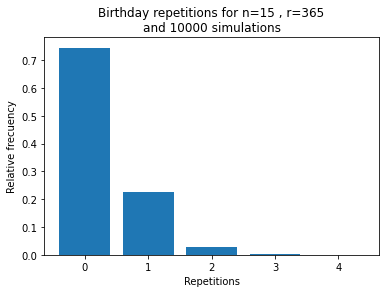

{0: 0.7444, 1: 0.2264, 2: 0.0268, 3: 0.0019, 4: 0}

In [60]:
# Numerical simulation

def sim_birthday(r,numSim,n,plot=True):
    '''
    Runs numSim simulations, picking birth dates at random for a group of n people.
    Finds out the relative frecuency of each repetition number that occurred during 
    the simulations.
    
    r: a positive integer. The size of the sample space of possible birth dates (normally,
    365).
    numSim: a positive integer. Number of simulations run.
    n: a positive integer. Number of people for which a birth date is selected.
    plot: a boolean, True if you want to plot a bar graph, False otherwise.
    
    returns: a dictionary, with the relative frecuencies of each repetition number.
    '''
    import random
    import pylab as py
    
    repetitions = {}
    contribution= 1.0/numSim
    for t in range(numSim):
        birth_record = []
        for person in range(n):
            birth_record.append(random.randint(1,r))
        
        try:
            repetitions[n - len(set(birth_record))] +=contribution
        except KeyError:
            repetitions[n - len(set(birth_record))] =0
            
    if plot: 
        py.figure('')
        py.bar(repetitions.keys(),repetitions.values(),tick_label = [str(l) for l in repetitions.keys()])
        py.xlabel('Repetitions')
        py.ylabel('Relative frecuency')
        py.title('Birthday repetitions for n=' + str(n) + 
             ' , r=' + str(r) + '\n' + 'and ' + str(numSim) + ' simulations')
        py.show()
    
   
    ordered ={}
    for i in range(n):
        try:
            ordered[i] =round(repetitions[i],4) 
        except KeyError:
            continue
                
    return ordered

sim_birthday(365,10000,15)

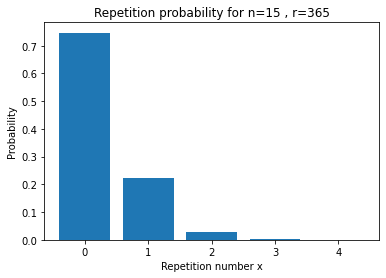

{0: 0.7471, 1: 0.2235, 2: 0.0275, 3: 0.0018, 4: 0.0001}

In [57]:
# Analytical calculation. Recursive algorithm.

import math
import numpy as np


    
def recursion(n,dev_list,total_set,inter_set):
    '''
    n: a positive integer.
    dev_list: a list full of 1's, with length predetermined by another function.
    total_set: an empty set.
    inter_set: an empty set.
    
    Modifies the input sets, inserting in total_set every combination of
    len(dev_list) positive integers that sum the number n. It works recursively. 
    It also stores every intermediate step in inter_set, so it can halt the computation
    just after it calculates an already produced intermediate step.
    '''
    
    if sum(dev_list) == n:
        total_set.add(tuple(dev_list))
    else:
        for i in range(len(dev_list)):
            temp_list= dev_list[:]
            temp_list[i] +=1
            if tuple(temp_list) not in (total_set and inter_set):
                inter_set.add(tuple(temp_list))
                recursion(n,temp_list,total_set,inter_set)
    
    
def summation(n,s):
    import numpy as np
    import math
    
    '''
    n: an integer >= 1
    s: an integer >=1 and less or equal to n.
    
    Calculates the summation of the Birthday repetition probability function, given that
    s = n-x
    '''
    def myprod(list):
        if len(list)==0:
            return 1
        else:
            ans=1
            for i in list:
                ans *=i
            return ans
    
    dev_list = list(np.full(s,1))
    total_set= set()
    inter_set= set()
    result=0
    
    recursion(n,dev_list,total_set,inter_set)
    for j in total_set:
        result += math.factorial(n)//(myprod(list(map(math.factorial,j))))
        #Hay un bug aquí: para sumatorio2(20,2) da un resultado negativo (birth_prob(5,20,18))
        #El bug está en la función np.prod. He hecho una propia.
    return result

def birth_prob(r,n,x):
    '''
    r: an integer >=1
    n: an integer >=1
    x: an integer >=0 and <n
    
    Calculates the probability of having x repeated values in a group of size n, 
    when the sample space has r posible values.
    '''
    import math
    
    assert r>=1 and n>=1 and x>=0 and type(r)==int and type(n)==int and type(x)==int , 'Inputs should be positive integers, nonnegative in the case of x'
    assert x<n, 'The repetition number x should be less than n'
    try:
        return round(math.comb(r,n-x)*summation(n,n-x)/(r**n),4)
    except ValueError:
        return 0.0
    
def calc_birthday(n,r,xmax,plot=True):
    '''
    Uses birth_prob for range(0,xmax+1) in the x number. Plots the results.
    
    r: an integer >=1. Sample space size
    n: an integer >=1. Number of people in the group
    xmax: an integer >=0 and <n. Maximum repetition number
    plot: a boolean, True if you want to plot a bar graph, False otherwise.
    
    returns: a dictionary with the results.
    '''
    
    import pylab as py
    
    results = {}
    
    for i in range(xmax+1):
        results[i] = birth_prob(r,n,i)
    
    if plot:
        py.figure('')
        py.bar(results.keys(),results.values(),tick_label = [str(l) for l in results.keys()])
        py.xlabel('Repetition number x')
        py.ylabel('Probability')
        py.title('Repetition probability for n=' + str(n) + 
             ' , r=' + str(r))
        py.show()
    
    return results

calc_birthday(15,365,4)

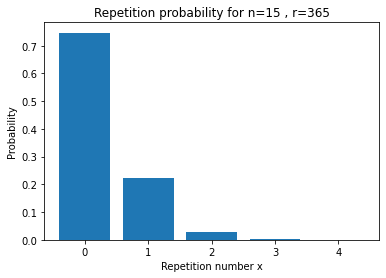

{0: 0.7471, 1: 0.2235, 2: 0.0275, 3: 0.0018, 4: 0.0001}

In [59]:
# Analytical calculation. Stochastic algorithm.  
    
    
def summation2(n,x):
    
    '''
    n: an integer >= 1
    x: an integer >=0 and less or equal to n.
    
    Calculates the summation of the Birthday repetition probability function by randomly
    searching combinations of (n-x) integers that sum n. Kind of goofy, but works.
    '''
    import random as ran
    import numpy as np
    import math
    
    assert n>=1 and x>=0 and type(n)==int and type(x)==int , 'Inputs should be positive integers, nonnegative in the case of x'
    assert x<n, 'The number of repetitions x should be less than n'
    
    indices = list(np.full(n-x-1,n//(n-x))) + [n%(n-x) + n//(n-x)]
    dictio ={}
    bino= math.comb(n-1,n-x-1)
    if sum(indices) == len(indices):                
        return math.factorial(n)
    
    while len(dictio) < bino:
        if tuple(indices) not in dictio:
            dictio[tuple(indices)] = math.factorial(n)/(np.prod(list(map(math.factorial,indices))))
        
            
        operation=False
        while not operation:
            ranin= ran.randint(0,len(indices)-1)
            if indices[ranin]>1:
                indices[ranin]-=1
                indices[ran.randint(0,len(indices)-1)] +=1
                operation= True
            else:
                continue
            
    return sum(list(dictio.values()))    


def rand_birth_prob(r,n,x):
    '''
    r: an integer >=1
    n: an integer >=1
    x: an integer >=0 and <n
    
    Calculates the probability of having a repetition number of x in a group of size n, 
    when the sample space has r posible values. Uses a stochastic process (the summatory function)
    to do the calculation.
    '''
    import math
    
    assert r>=1 and n>=1 and x>=0 and type(r)==int and type(n)==int and type(x)==int , 'Inputs should be positive integers, nonnegative in the case of x'
    assert x<n, 'The number of repetitions x should be less than n'
    
    return round(math.comb(r,n-x)*summation2(n,x)/(r**n),4)

def random_birthday(r,n,xmax,plot =True):
    '''
    Uses rand_birth_prob for range(0,xmax+1) in the x number. Plots the results.
    
    r: an integer >=1. Sample space size.
    n: an integer >=1. Number of people in the group.
    xmax: an integer >=0 and <n. Maximum repetition number.
    plot: a boolean, True if you want to plot a bar graph, False otherwise.
    
    returns: a dictionary with the results.
    '''
    import pylab as py
    
    results = {}
    
    for i in range(xmax+1):
        results[i] = rand_birth_prob(r,n,i)
    
    if plot:
        py.figure('')
        py.bar(results.keys(),results.values(),tick_label = [str(l) for l in results.keys()])
        py.xlabel('Repetition number x')
        py.ylabel('Probability')
        py.title('Repetition probability for n=' + str(n) + 
             ' , r=' + str(r))
        py.show()
    
    return results

random_birthday(365,15,4)

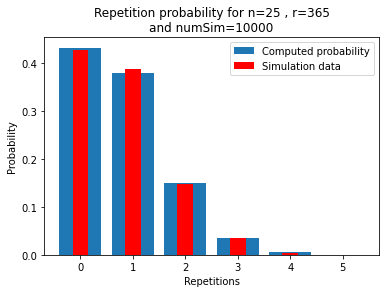

Computed probability:
{0: 0.4313, 1: 0.3794, 2: 0.1489, 3: 0.0345, 4: 0.0053, 5: 0.0006}

Simulation data:
{0: 0.4255, 1: 0.3872, 2: 0.1468, 3: 0.0349, 4: 0.0045, 5: 0.0005}


In [50]:
#Comparison of simulation data with computed probabilities

n=25
r=365
numSim= 10000

simul = sim_birthday(r,numSim,n,False)

recur = calc_birthday(n,r,len(simul.keys())-1,False)

py.figure('')
py.bar(recur.keys(),recur.values(),label='Computed probability')
py.bar(simul.keys(),simul.values(),tick_label = [str(l) for l in simul.keys()],
      width = 0.3, color ='r',label='Simulation data')
py.xlabel('Repetitions')
py.ylabel('Probability')
py.title('Repetition probability for n=' + str(n) + 
             ' , r=' + str(r) + '\n'+ 'and numSim='+ str(numSim))
py.legend(loc='best')
py.show()

print('Computed probability:')
print(recur)
print('\n'+'Simulation data:')
print(simul)